# TP1 Big Data - M2 MAP3 - Perrot/Deporte

In [1]:
import numpy as np
import matplotlib.pyplot as plt

###  1.

In [2]:
def f(x,g,s):
    n = g.shape[0]
    l = x.shape[0]
    y = np.zeros(l)
    for i in range(n):
        gg = np.vstack([g[i]]*l)
        y += np.exp(- np.linalg.norm(gg - x,axis=1) ** 2 / 2 /s[i]**2)
    return y

###  2.

In [3]:
def ensalea(n,a,flag=0):
    
    g = np.random.uniform(.2,.8,(n,2))
    s = np.random.uniform(0,a,n)
    if flag == 1 :
        l = 10000
        x = np.random.uniform(0,1,(l,2))
        y = f(x,g,s)
        x_A = x[np.where(y>1/2)[0],:]
        plt.figure(figsize=(6,6))
        plt.xlim(0,1)
        plt.ylim(0,1)
        plt.scatter(x_A[:,0],x_A[:,1],c='magenta',marker='o')
        plt.grid();
        
    for i in range(n):
        gg = np.vstack([g[i]]*l)
        
    return g,s

###  3.

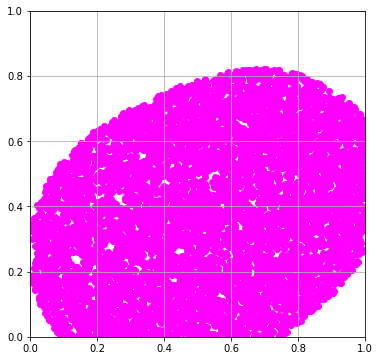

In [4]:
n = 4
a = .3
g,s = ensalea(n,a,1)

###  4.

In [5]:
def echant(l,g,s):
    x = np.random.uniform(0,1,(l,2))
    y = (f(x,g,s) > 1/2)*1*2 -1
    return x,y

###  5.

In [6]:
def estens(x,y,p):
    X1 = x[:,0]
    X2 = x[:,1]
    Lm = np.zeros((p,p))
    Lp = np.zeros((p,p))
    l = len(X1)
    for k in range(l):
        i = int(p * X1[k])
        j = int(p * X2[k])
        Lm[i,j] += (y[k] == -1)*1
        Lp[i,j] += (y[k] == 1)*1
    B = (Lp > Lm) * 1
    Re = 0
    for k in range(l):
        i = int(p * X1[k])
        j = int(p * X2[k])
        Re += ((B[i,j] * 2 - 1) != y[k])*1

    Re /= l
    return B, Re

Risque empirique : 0.00385


<Figure size 504x504 with 0 Axes>

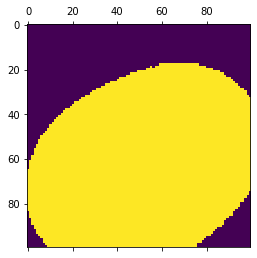

In [7]:
l = 10**5
p = 100
x,y = echant(l,g,s)
B, Re = estens(x,y,p)

plt.figure(figsize=(7,7))
plt.matshow(np.flip(B.T,axis=0));
print("Risque empirique :",Re)

###  6.

In [8]:
def testens(B,m,g,s):
    x_test, y_test = echant(m,g,s)
    p = B.shape[0]
    R = 0
    for k in range(m):
        i = int(p * x_test[k,0])
        j = int(p * x_test[k,1])
        R += ((B[i,j]*2-1) != y_test[k])*1

    R /= m
    return R

###  7.

l = 100, p minimisant : 5
l = 500, p minimisant : 10
l = 1000, p minimisant : 15
l = 10000, p minimisant : 38


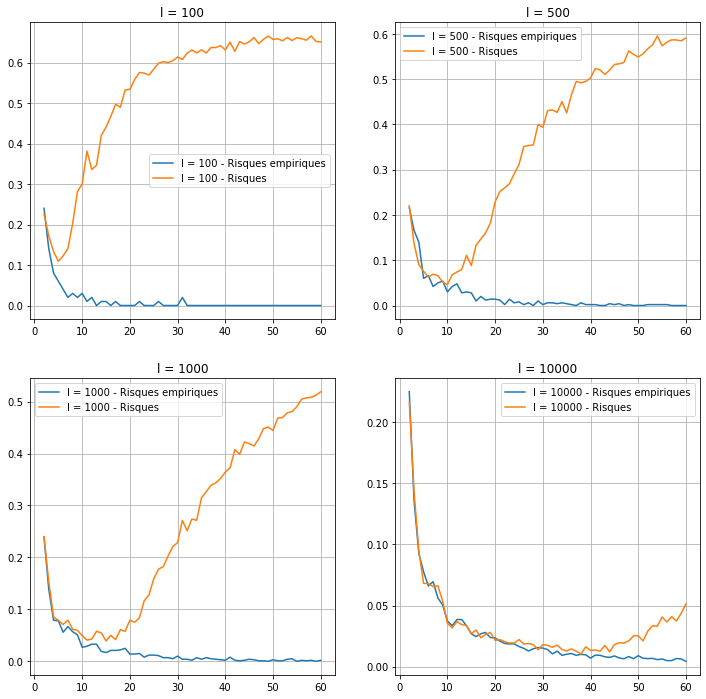

In [9]:
ls = [100, 500, 1000, 10000]
ps = np.arange(2,61)

plt.figure(figsize=(12,12))
m = 4600
p_mins = []

for _1 in range(len(ls)) :
    plt.subplot(2,2,_1+1,title=f'l = {ls[_1]}')
    Res = []
    Rs  = []
    for _2 in range(len(ps)) :
        x_train,y_train = echant(ls[_1],g,s)
        B, Re = estens(x_train,y_train,ps[_2])
        R = testens(B,m,g,s)
        Res.append(Re)
        Rs.append(R)
    p_mins.append(ps[np.argmin(Rs)])
        
    plt.plot(ps,Res, label=f'l = {ls[_1]} - Risques empiriques')
    plt.plot(ps,Rs,  label=f'l = {ls[_1]} - Risques')

    plt.grid();
    plt.legend();
    
for i in range(4):
    print(f"l = {ls[i]}, p minimisant : {p_mins[i]}")

**Commentaires :**
- > Evolution des deux courbes, à $l$ fixé, $p$ variant : la courbe de risque empirique décroit jusqu'à atteindre (au moins en théorie) 0. La courbe de risque sur le test set (=erreur de généralisation) commence par décroître (underfitting), passe par un optimum, puis croît à nouveau (overfitting du modèle)

- > Lorsque $l$ augmente, le $\hat{p}$ minimiseur augmente : quand la taille d'échantillon augmente, l'optimum du risque sur le test set est atteint sur des modèles plus complexes, et cet optimum diminue. L'augmentation de la taille de l'échantillon permet de "s'offrir" un modèle plus riche et plus performant.

- > A $p$ fixé, le risque sur le test set diminue quand la taille de l'échantillon augmente; à modèle donné, la performance du modèle est d'autant meilleure que la taille de l'échantillon est grande.

**En particulier, cette expérience illustre :**
- > On distingue bien les trois régimes d'un modèle : underfitting quand la taille du training set est insuffisante pour permettre au modèle d'apprendre et de réaliser de bonnes performances sur le test set, région autour de l'optimum de performance sur le test-set, puis overfitting quand le modèle est devenu trop riche pour l'échantillon, et sur-apprend le training set, ce qui se traduit par une mauvaise généralisation et de mauvaises performances sur le test-set.

- > On voit que quand la taille de l'échantillon augmente, $R^{*}_{p}$, qui est approximée par l'erreur empirique, diminue. La performance du modèle augmente avec sa complexité, dès lors que l'on dispose d'un échantillon suffisamment important pour éviter l'overfitting.